<img src='https://gazetadasemana.com.br/images/noticias/78040/30064552_altaLOGOS_.png.png' width=500>

# Oversampling
Authorship: Raul Macedo


It has been observed, through training a model with MLPClassifier, that there is a deficiency of class 0 in the PRP data (resulting in oversampling for failure class 5 data). This scenario is likely due to the transformation of transition data into failure data.

To overcome the absence of zero classes, two workarounds have been proposed and will be employed:

1. Artificially create more class 0 data using the SMOTE method.
2. Include additional normal operation data in the dataset, already present in the 3W.

## **1. Artificial Filling**
The SMOTE method is going to be used to fill data artificially

In [1]:
#General imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from utils import save_csv_if_doesnt_exist



In [2]:
PRP_df = pd.read_csv('./PRP_treated_data.csv')

# Evaluating the predominance of the "class"

In [3]:
count_classes = pd.value_counts(PRP_df['class'], sort = True).sort_index()
count_classes

0.0     33535
5.0    328463
Name: class, dtype: int64

In [4]:
X = PRP_df.drop(columns=['Unnamed: 0', 'timestamp','class','file_name'],axis=1).copy()
Y = PRP_df['class']

In [5]:
counter = Counter(Y)
for k,v in counter.items():
	per = v / len(Y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=33535 (9.264%)
Class=5, n=328463 (90.736%)


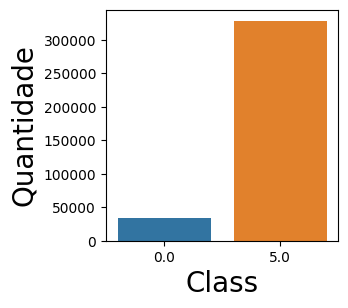

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
ax = sns.countplot(data=PRP_df, x=Y)
np.bincount(Y)
plt.xlabel("Class", fontdict={'size':20})
plt.ylabel("Quantidade",fontdict={'size':20})
plt.show()

In order to mitigate the imbalance in the distribution of artificial data among the test data, it is advisable to perform the relative data filling within the already subdivided sets found in this work in the directory `feature_selection_results`. Thus, the 3 training training csvs must be filled artificially.

In [7]:
train1 = pd.read_csv('./feature_selection_results/train1.csv')
train2 = pd.read_csv('./feature_selection_results/train2.csv')
train3 = pd.read_csv('./feature_selection_results/train3.csv')


Data profile before filling

In [8]:
# train1_zero_class = train1[train1['0'].eq(0)]
# train1_zero_class.plot.scatter(x='Unnamed: 0',y='P-PDG',title='P-PDG - Antes preenchimento',figsize=(20,10),color='b')
# train1_zero_class.plot.scatter(x='Unnamed: 0',y='P-TPT',title='P-TPT - Antes preenchimento',figsize=(20,10),color='r')
# train1_zero_class.plot.scatter(x='Unnamed: 0',y='T-TPT',title='T-TPT - Antes preenchimento',figsize=(20,10),color='g')
# train1_zero_class.plot.scatter(x='Unnamed: 0',y='P-MON-CKP',title='P-MON-CKP - Antes preenchimento',figsize=(20,10),color='y')
# train1_zero_class.plot.scatter(x='Unnamed: 0',y='T-JUS-CKP',title='T-JUS-CKP - Antes preenchimento',figsize=(20,10),color='m')
# train1_zero_class.plot.scatter(x='Unnamed: 0',y='P-JUS-CKGL',title='P-JUS-CKGL - Antes preenchimento',figsize=(20,10),color='orange')



In order to try to observe a more expressive behavior in the trainings, we will increase the quantity of class 0 vectors in each dataset by 3X.

In [9]:
def fill_artificial_data(dataset:DataFrame,multiplier = 3):
    """Uses SMOTE to increase data for 0 class in de given dataset by the given multiplier
    This function is not as much generic as it could be, it works only for the context of this notebook. 
    Parameters
    ----------
    dataset: Pandas.DataFrame
    Dataset to increase the quantity of vectors with 0 class
    multiplier: int or float
    factor to increase the size of data"""
    X = dataset.drop(columns=['0'],axis=1).copy()
    Y = dataset['0']
    zero_quantity = len(dataset[dataset['0']==0.0])
    five_quantity = len(dataset[dataset['0']==5.0])
    sm = SMOTE(sampling_strategy={0.0:zero_quantity*multiplier,5.0:five_quantity},k_neighbors=5)
    X,Y = sm.fit_resample(X,Y)
    counter = Counter(Y)
    for k,v in counter.items():
        per = v / len(Y) * 100
        print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    print('\n')
    return pd.concat([X,Y], axis=1)

In [10]:
train1_fill = fill_artificial_data(train1)
train2_fill = fill_artificial_data(train2)
train3_fill = fill_artificial_data(train3)

Class=5, n=229923 (76.552%)
Class=0, n=70425 (23.448%)


Class=5, n=229900 (76.533%)
Class=0, n=70494 (23.467%)


Class=5, n=229849 (76.490%)
Class=0, n=70647 (23.510%)




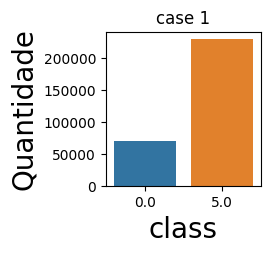

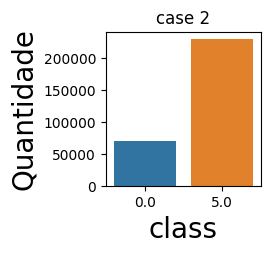

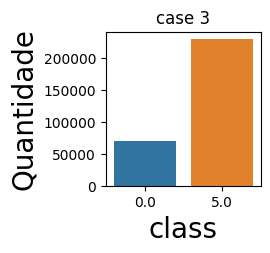

In [11]:
fig = plt.figure(figsize=(2,2))
ax = sns.countplot(data=train1_fill, x=train1_fill['0'])
np.bincount(train1_fill['0'])
plt.xlabel("class",fontdict={'size':20})
plt.ylabel("Quantidade",fontdict={'size':20})
plt.title('case 1')
plt.show()
##
fig = plt.figure(figsize=(2,2))
ax = sns.countplot(data=train2_fill, x=train2_fill['0'])
np.bincount(train2_fill['0'])
plt.xlabel("class",fontdict={'size':20})
plt.ylabel("Quantidade",fontdict={'size':20})
plt.title('case 2')
plt.show()
##
fig = plt.figure(figsize=(2,2))
ax = sns.countplot(data=train3_fill, x=train3_fill['0'])
np.bincount(train3_fill['0'])
plt.xlabel("class",fontdict={'size':20})
plt.ylabel("Quantidade",fontdict={'size':20})
plt.title('case 3')
plt.show()

Data Profile after SMOTE

In [12]:
# train1_fill_zeros = train1_fill[train1_fill['0'].eq(0)]
# # train1_fill_zeros.plot.scatter(x='Unnamed: 0', y='P-PDG - Depois Preenchimento',figsize=(20,10))

# train1_fill_zeros.plot.scatter(x='Unnamed: 0',y='P-PDG',title='P-PDG - Depois Preenchimento',figsize=(20,10),color='b')
# train1_fill_zeros.plot.scatter(x='Unnamed: 0',y='P-TPT',title='P-TPT - Depois Preenchimento',figsize=(20,10),color='r')
# train1_fill_zeros.plot.scatter(x='Unnamed: 0',y='T-TPT',title='T-TPT - Depois Preenchimento',figsize=(20,10),color='g')
# train1_fill_zeros.plot.scatter(x='Unnamed: 0',y='P-MON-CKP',title='P-MON-CKP - Depois Preenchimento',figsize=(20,10),color='y')
# train1_fill_zeros.plot.scatter(x='Unnamed: 0',y='T-JUS-CKP',title='T-JUS-CKP - Depois Preenchimento',figsize=(20,10),color='m')
# train1_fill_zeros.plot.scatter(x='Unnamed: 0',y='P-JUS-CKGL',title='P-JUS-CKGL - Depois Preenchimento',figsize=(20,10),color='orange')



In [13]:

save_csv_if_doesnt_exist(train1_fill,'./oversampling/oversampling_with_artificial_data/train_data_fill1.csv')
save_csv_if_doesnt_exist(train2_fill,'./oversampling/oversampling_with_artificial_data/train_data_fill2.csv')
save_csv_if_doesnt_exist(train3_fill,'./oversampling/oversampling_with_artificial_data/train_data_fill3.csv')

## **2. Filling with real data**
Data from the 3W will be used.
In this case, considering that the data is reliable, the attempt will be to increase the concentration of class 0 to at least close to the failure data.
For this purpose, the same treatments applied to the PRP data will be applied to the real data, which include filling NaN values in the class 0 (since they correspond to normal operation) and removing the column not considered in the PRP analysis: T-JUS-CKGL.

Deciding how many vectores are gonna be necessary to fill train1,train2 and train3. Considering that all normal operation real data files have an average of 17,800 vectors

## Visualizando dados antes do preenchimento

/home/rforonda@hu.corp/Documentos/Personal/PUC/TCC/3w_ann_prp/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'P-JUS-CKGL - Antes do Preenchimento'}, xlabel='Unnamed: 0', ylabel='P-JUS-CKGL'>

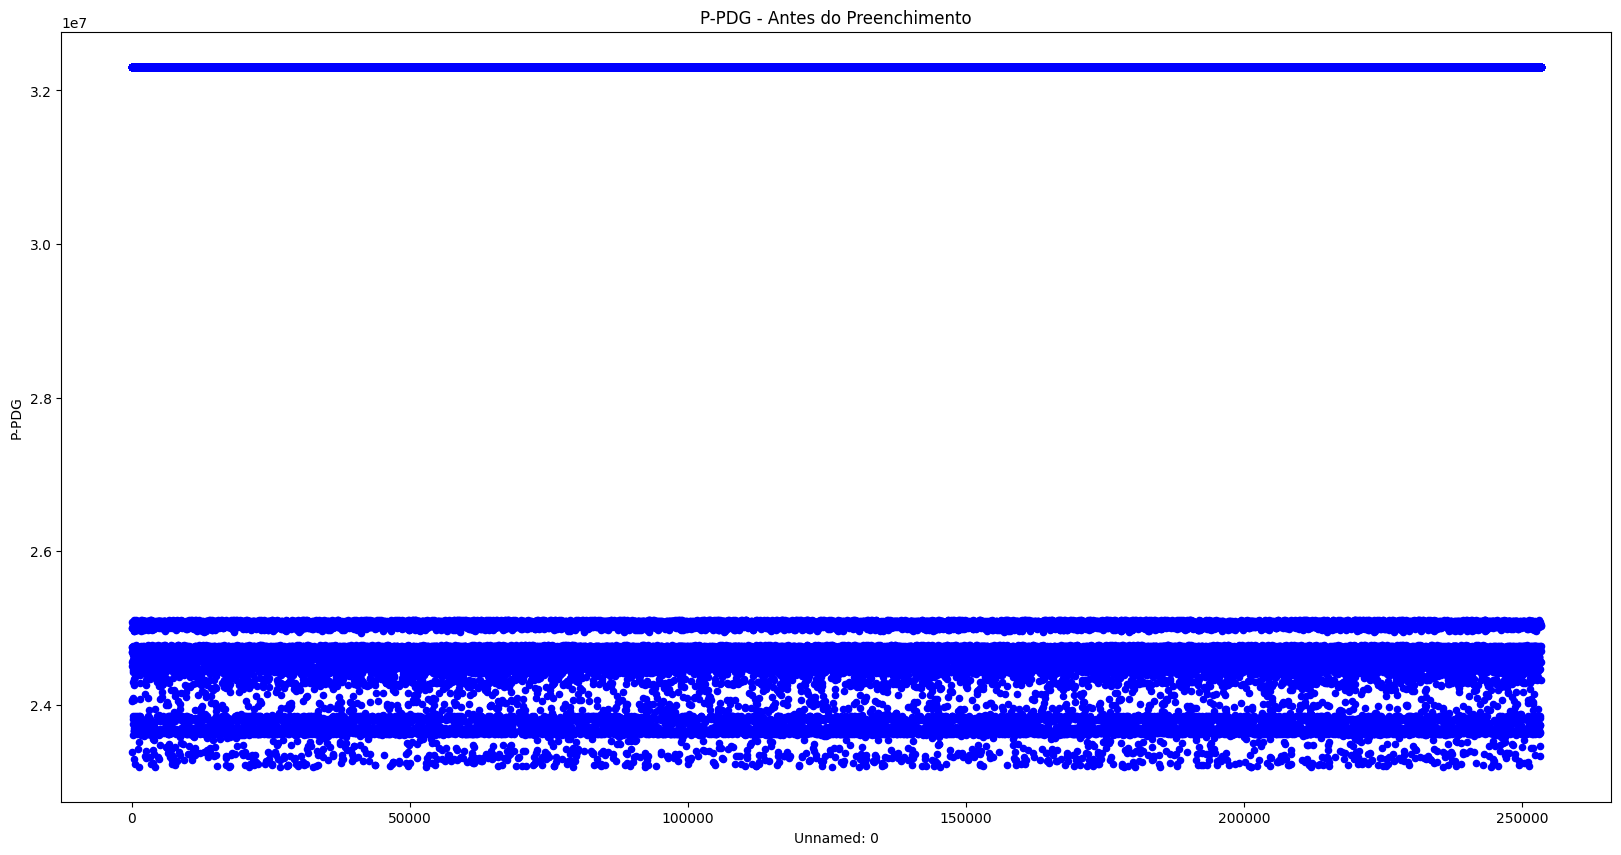

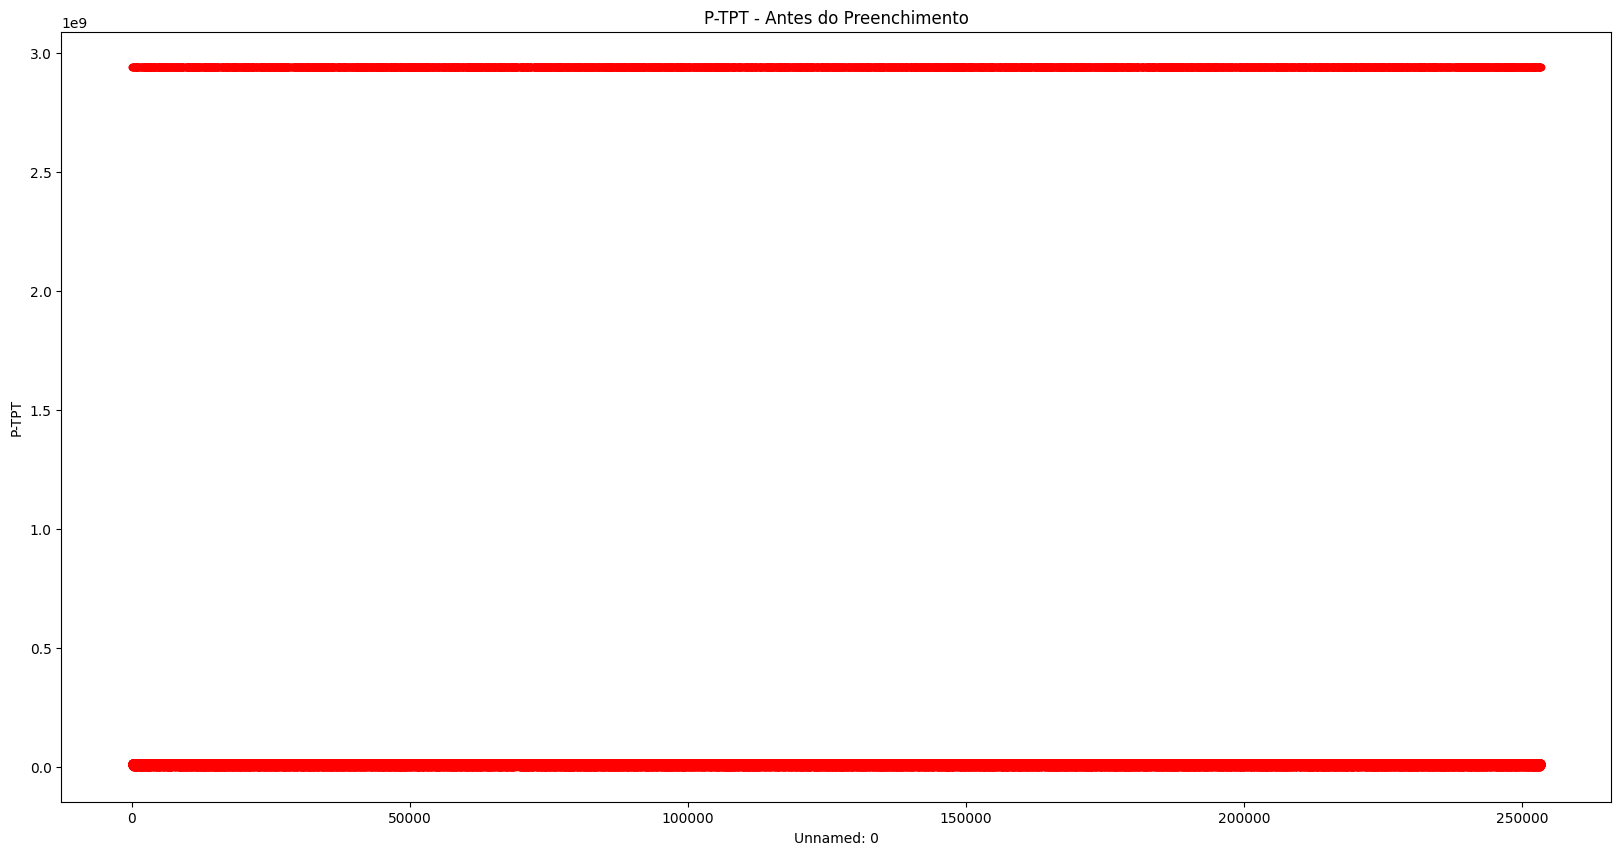

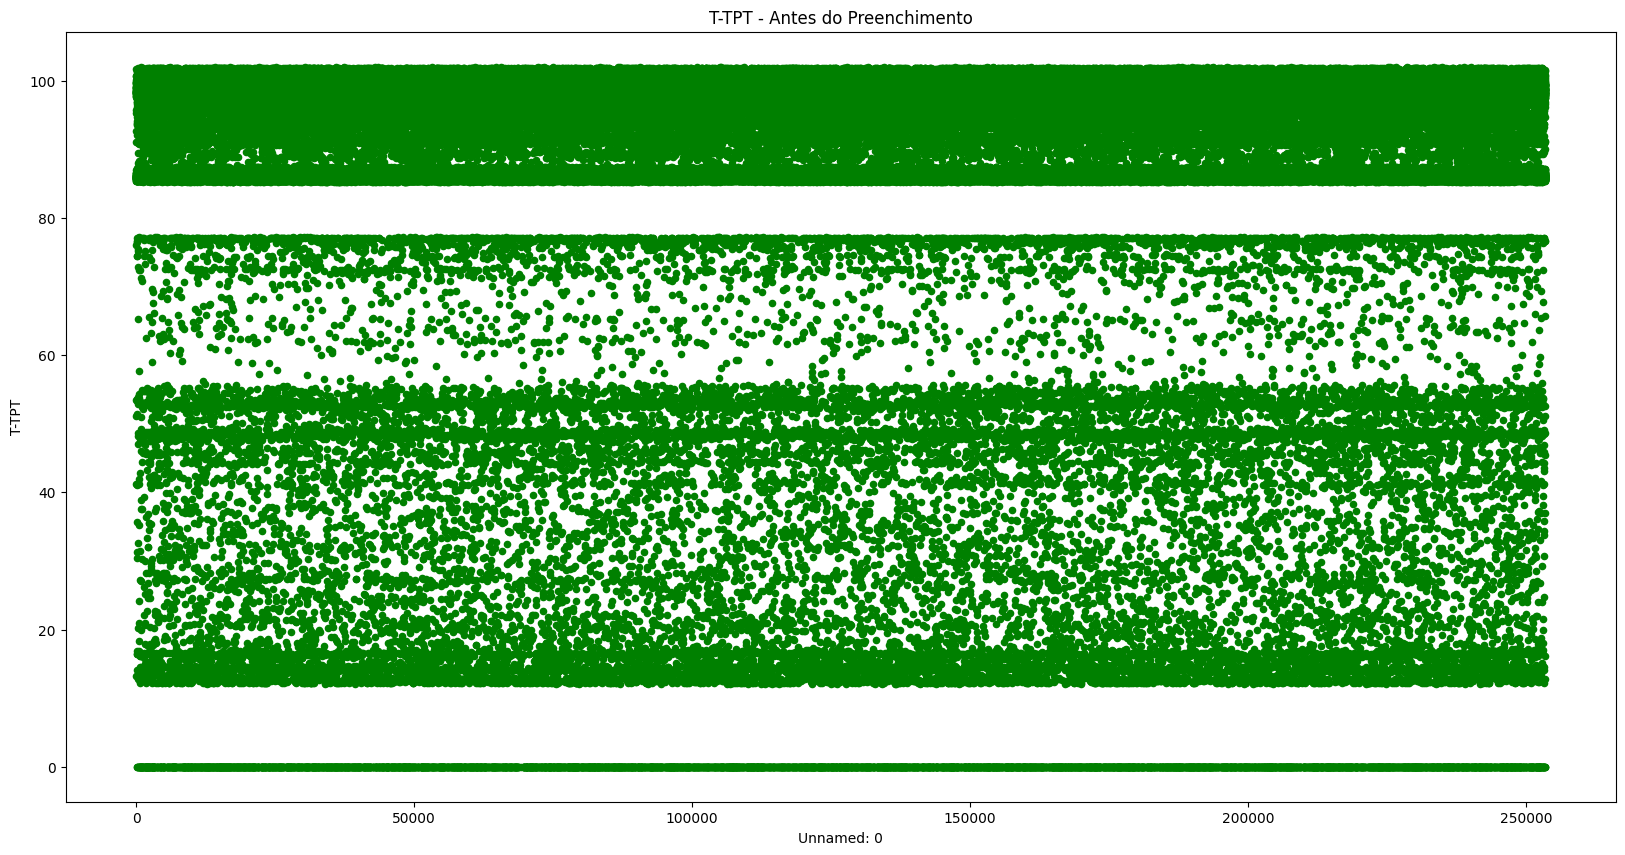

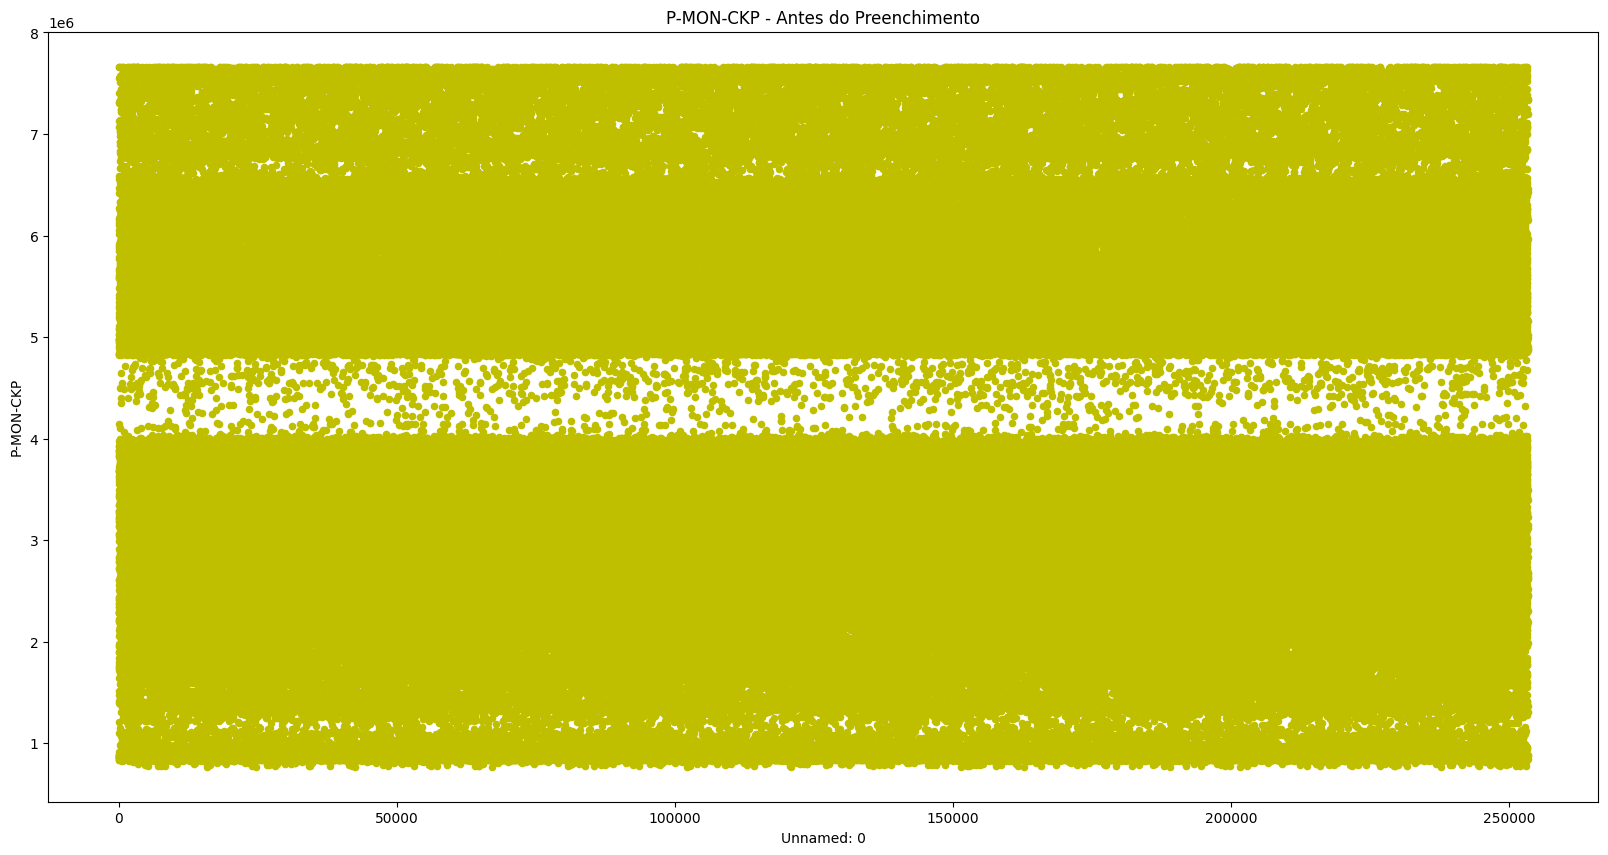

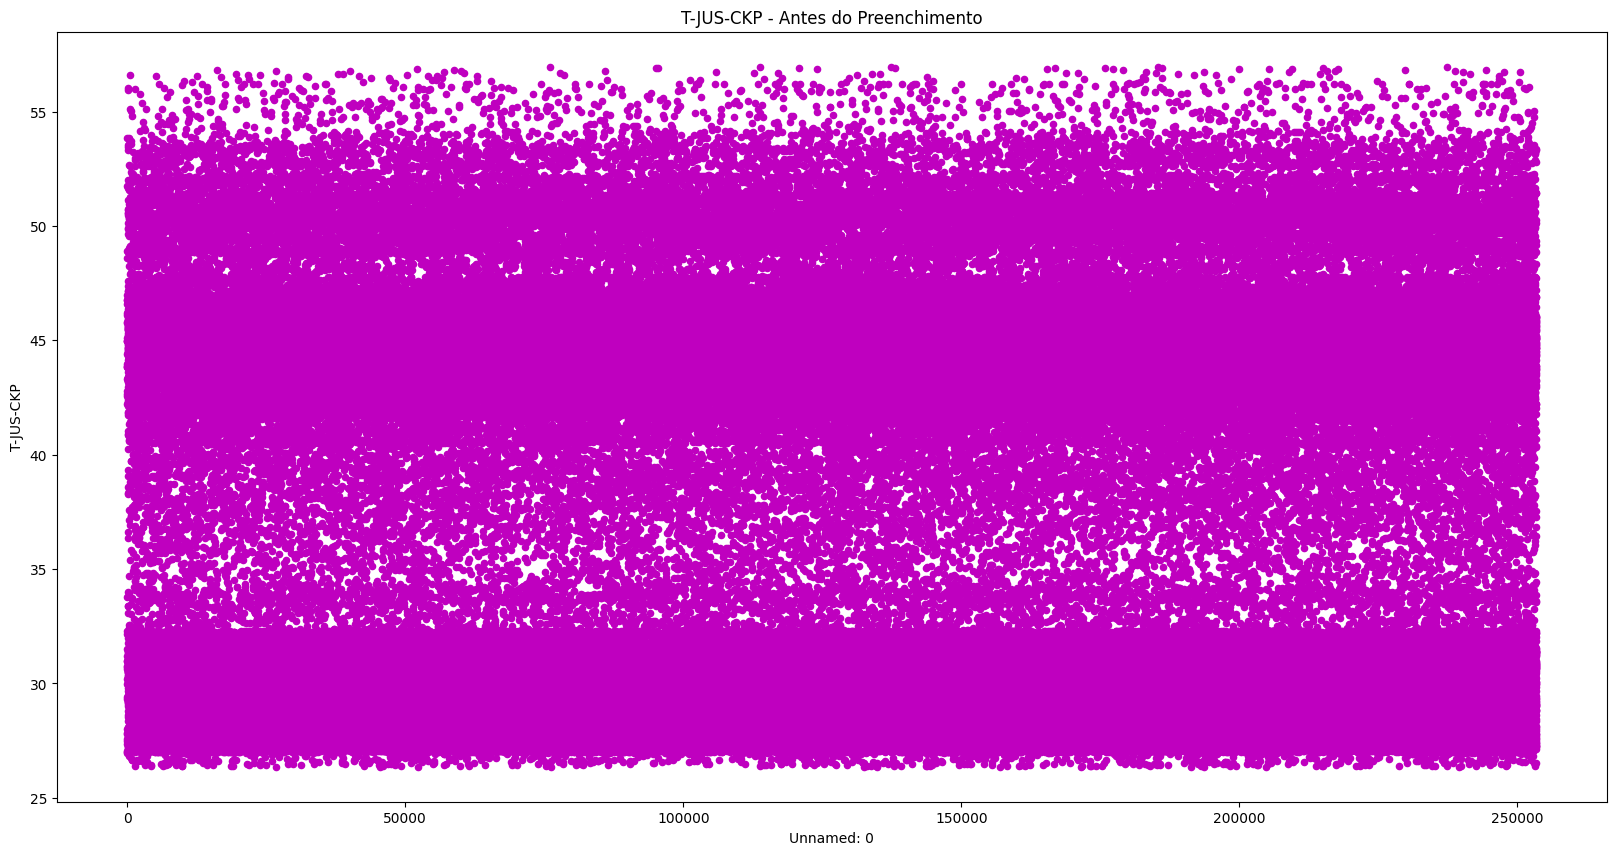

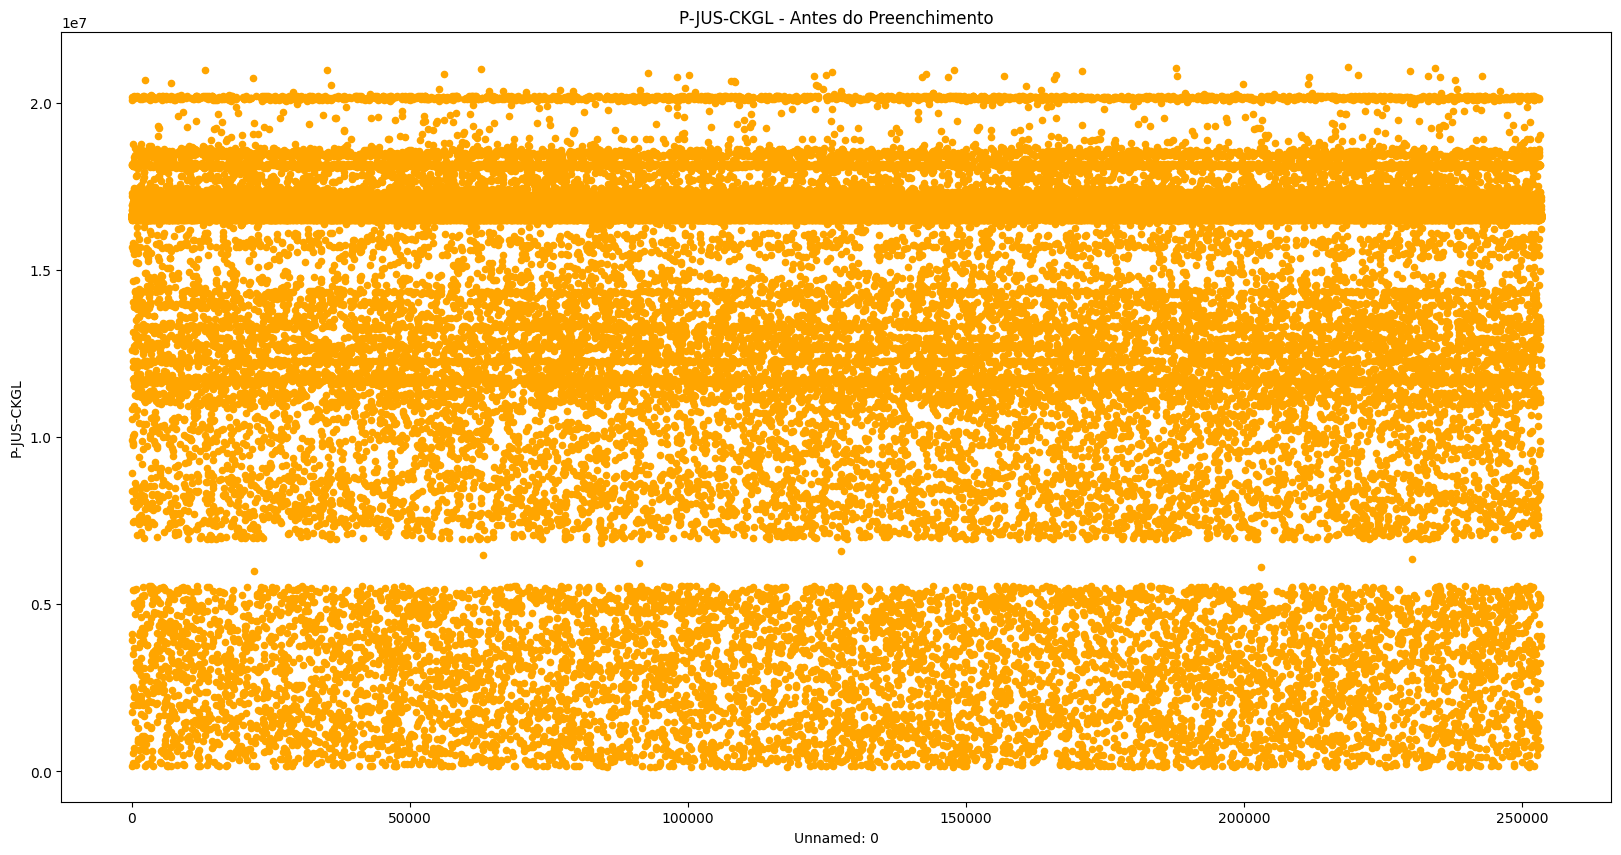

In [14]:
train1.plot.scatter(x='Unnamed: 0',y='P-PDG',title='P-PDG - Antes do Preenchimento',figsize=(20,10),color='b')
train1.plot.scatter(x='Unnamed: 0',y='P-TPT',title='P-TPT - Antes do Preenchimento',figsize=(20,10),color='r')
train1.plot.scatter(x='Unnamed: 0',y='T-TPT',title='T-TPT - Antes do Preenchimento',figsize=(20,10),color='g')
train1.plot.scatter(x='Unnamed: 0',y='P-MON-CKP',title='P-MON-CKP - Antes do Preenchimento',figsize=(20,10),color='y')
train1.plot.scatter(x='Unnamed: 0',y='T-JUS-CKP',title='T-JUS-CKP - Antes do Preenchimento',figsize=(20,10),color='m')
train1.plot.scatter(x='Unnamed: 0',y='P-JUS-CKGL',title='P-JUS-CKGL - Antes do Preenchimento',figsize=(20,10),color='orange')


In [15]:
X1 = train1.drop(columns=['Unnamed: 0'],axis=1).copy()
Y1 = train1['0']

In [16]:
def avarage_instances_needed(df:DataFrame):
    quantity_of_zeros = len(df[df['0'].eq(0)])
    quantity_of_fives = len(df[df['0'].eq(5)])
    return (quantity_of_fives-quantity_of_zeros)//17800
print(f'Serão necessários {avarage_instances_needed(train1)*17800} vetores do evento 0 para oversampling')
print(f'Serão necessários {avarage_instances_needed(train2)*17800} vetores do evento 0 para oversampling')
print(f'Serão necessários {avarage_instances_needed(train3)*17800} vetores do evento 0 para oversampling')

Serão necessários 195800 vetores do evento 0 para oversampling
Serão necessários 195800 vetores do evento 0 para oversampling
Serão necessários 195800 vetores do evento 0 para oversampling


In [17]:
vectores_needed = avarage_instances_needed(train3)*17800

 Approximately 11 files will be required to make the data equivalent in quantity.

In [18]:
master5_df = pd.read_csv('./main_class_five_&_zero.csv')

Remove NaN values from events 0

In [19]:
normal_op = master5_df[master5_df['event']==0].drop(columns=['timestamp','T-JUS-CKGL','QGL','event','file_name']).rename(columns={'class':'0'})

In [20]:
normal_op = normal_op.dropna()[normal_op['P-PDG'].gt(0)].copy()

/tmp/ipykernel_59800/3454282436.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normal_op = normal_op.dropna()[normal_op['P-PDG'].gt(0)].copy()


In [21]:
len(normal_op)

1520555

In [22]:
normal_op.eq(0).sum()

Unnamed: 0         85
P-PDG               0
P-TPT               0
T-TPT               0
P-MON-CKP           0
T-JUS-CKP           0
P-JUS-CKGL          0
0             1520555
dtype: int64

In [23]:
normal_op.columns

Index(['Unnamed: 0', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP',
       'P-JUS-CKGL', '0'],
      dtype='object')

In [24]:
vectors_to_fill = normal_op.iloc[:vectores_needed]

In [25]:
train1.isna().sum()

Unnamed: 0    0
P-PDG         0
P-TPT         0
T-TPT         0
P-MON-CKP     0
T-JUS-CKP     0
P-JUS-CKGL    0
0             0
dtype: int64

In [26]:
len(train1)
len(train2)
len(train3)

253398

In [27]:
data_balance_with_real1 = pd.concat([train1,vectors_to_fill])
data_balance_with_real2 = pd.concat([train2,vectors_to_fill.drop(columns=['T-TPT','P-MON-CKP'])])
data_balance_with_real3 = pd.concat([train3,vectors_to_fill.drop(columns=['P-TPT','P-MON-CKP'])])

/home/rforonda@hu.corp/Documentos/Personal/PUC/TCC/3w_ann_prp/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'P-JUS-CKGL - Depois Preenchimento'}, xlabel='Unnamed: 0', ylabel='P-JUS-CKGL'>

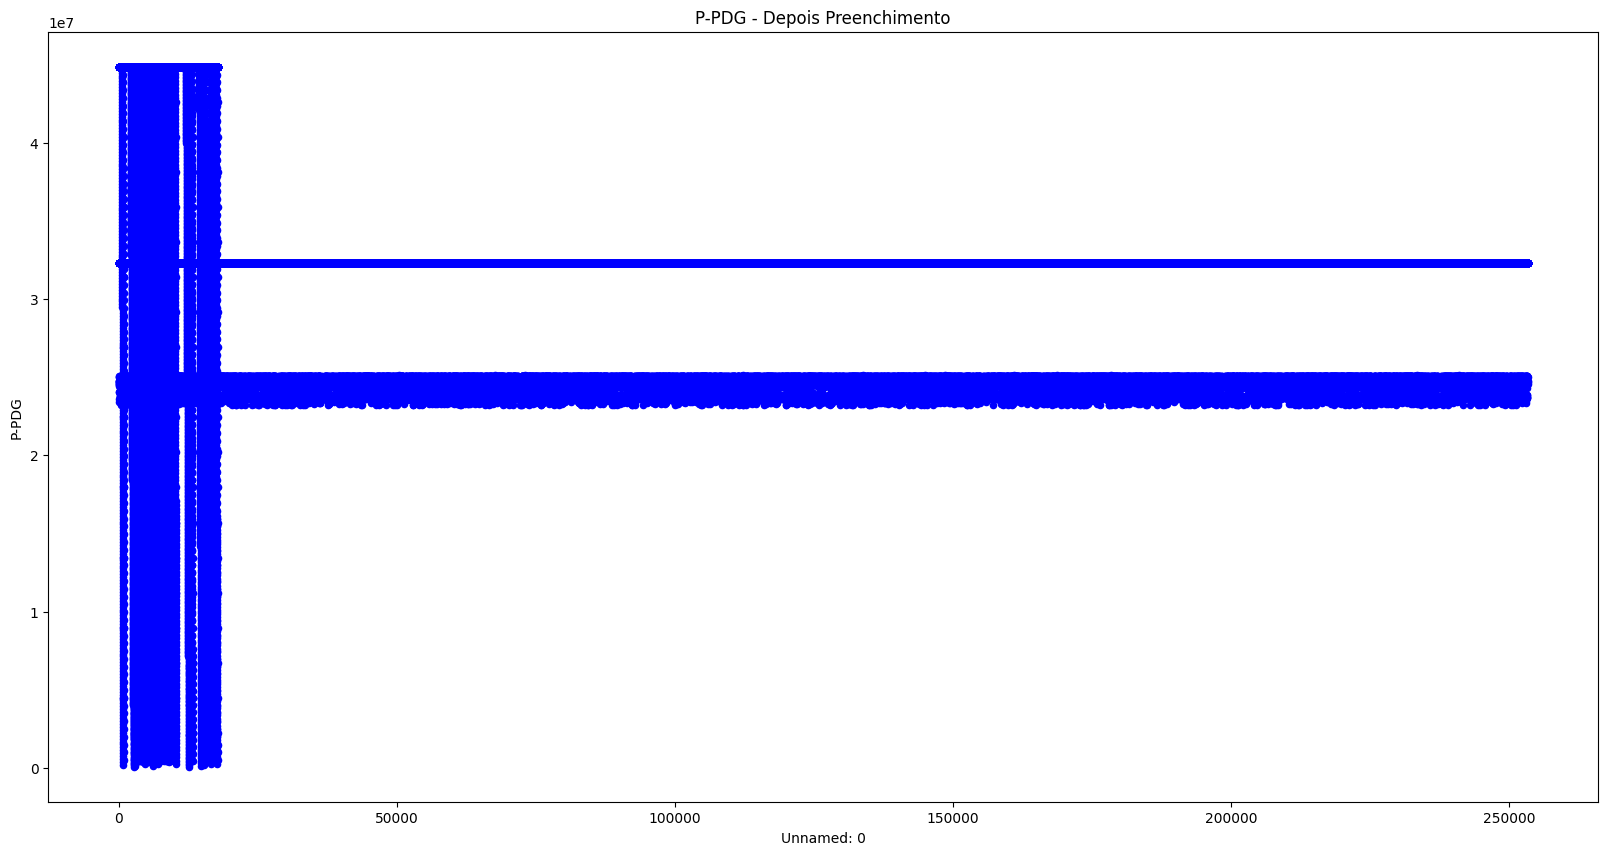

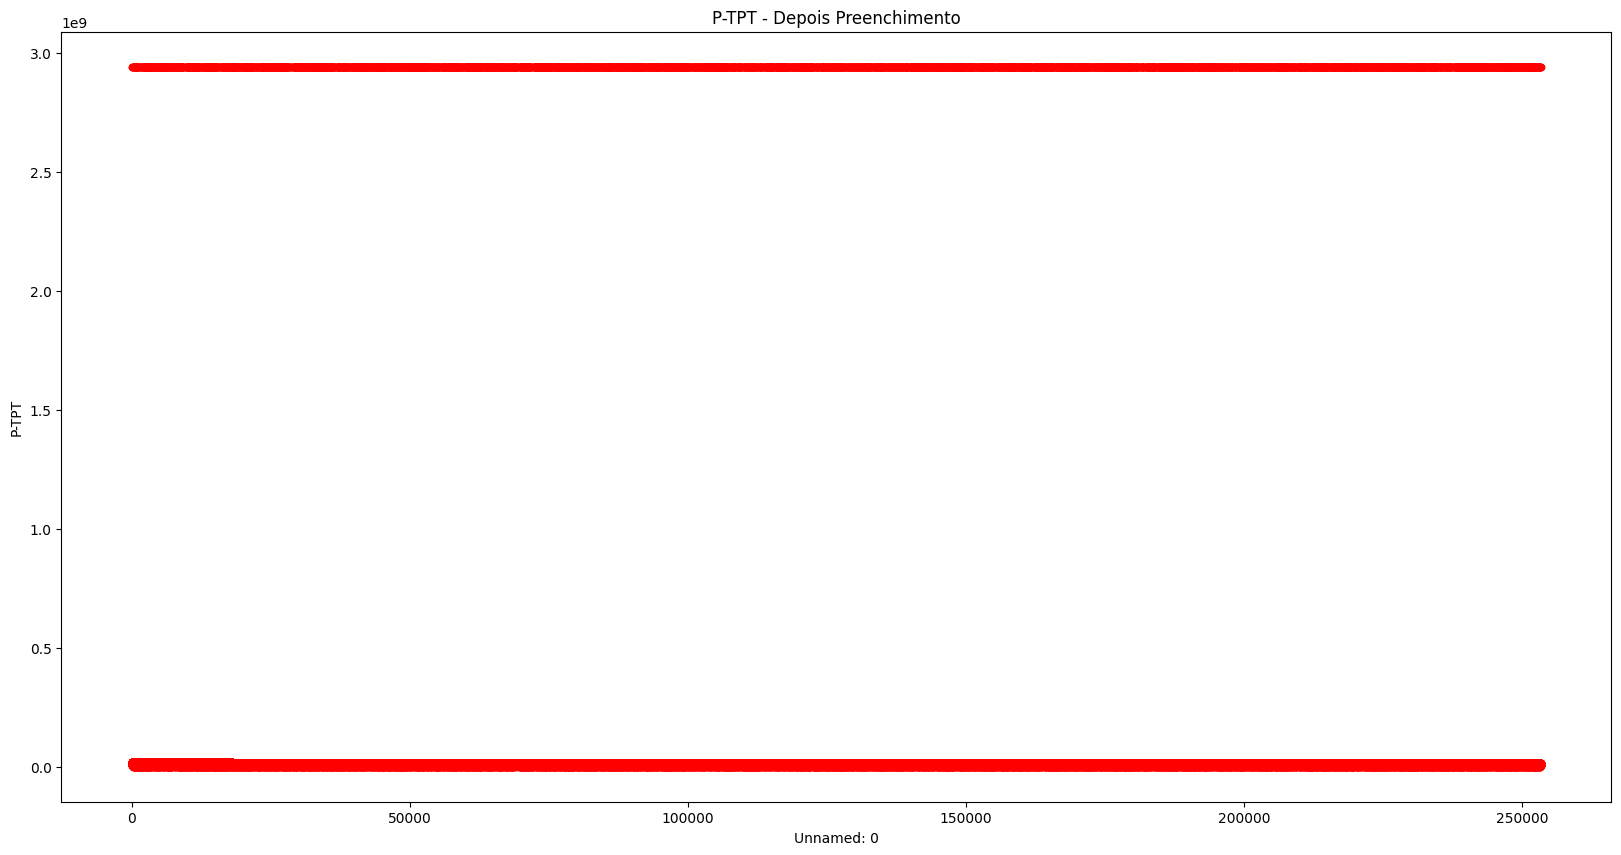

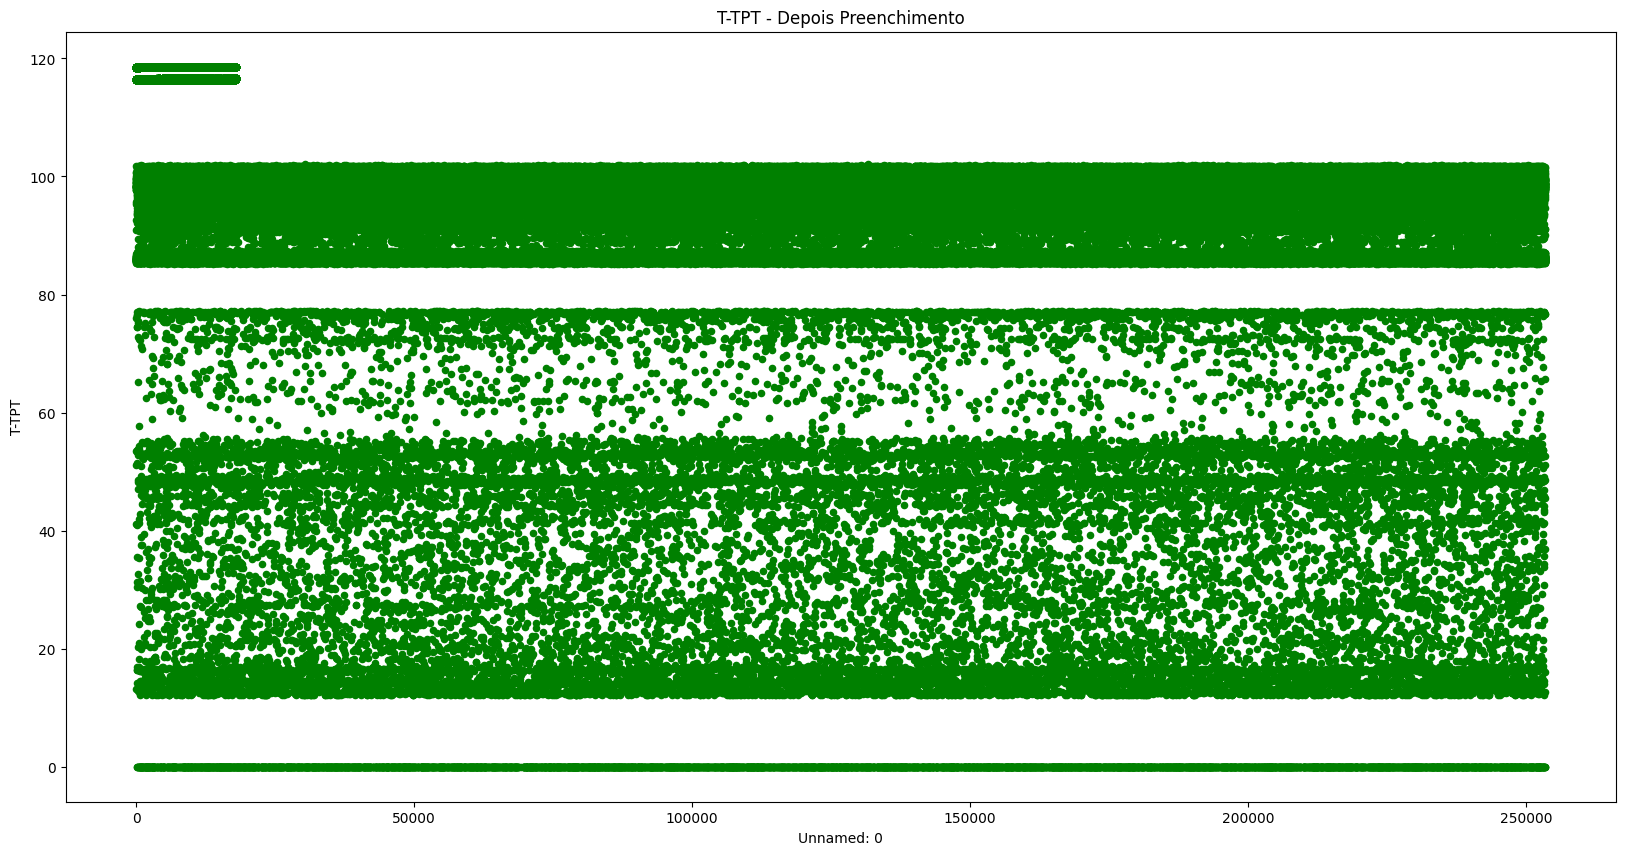

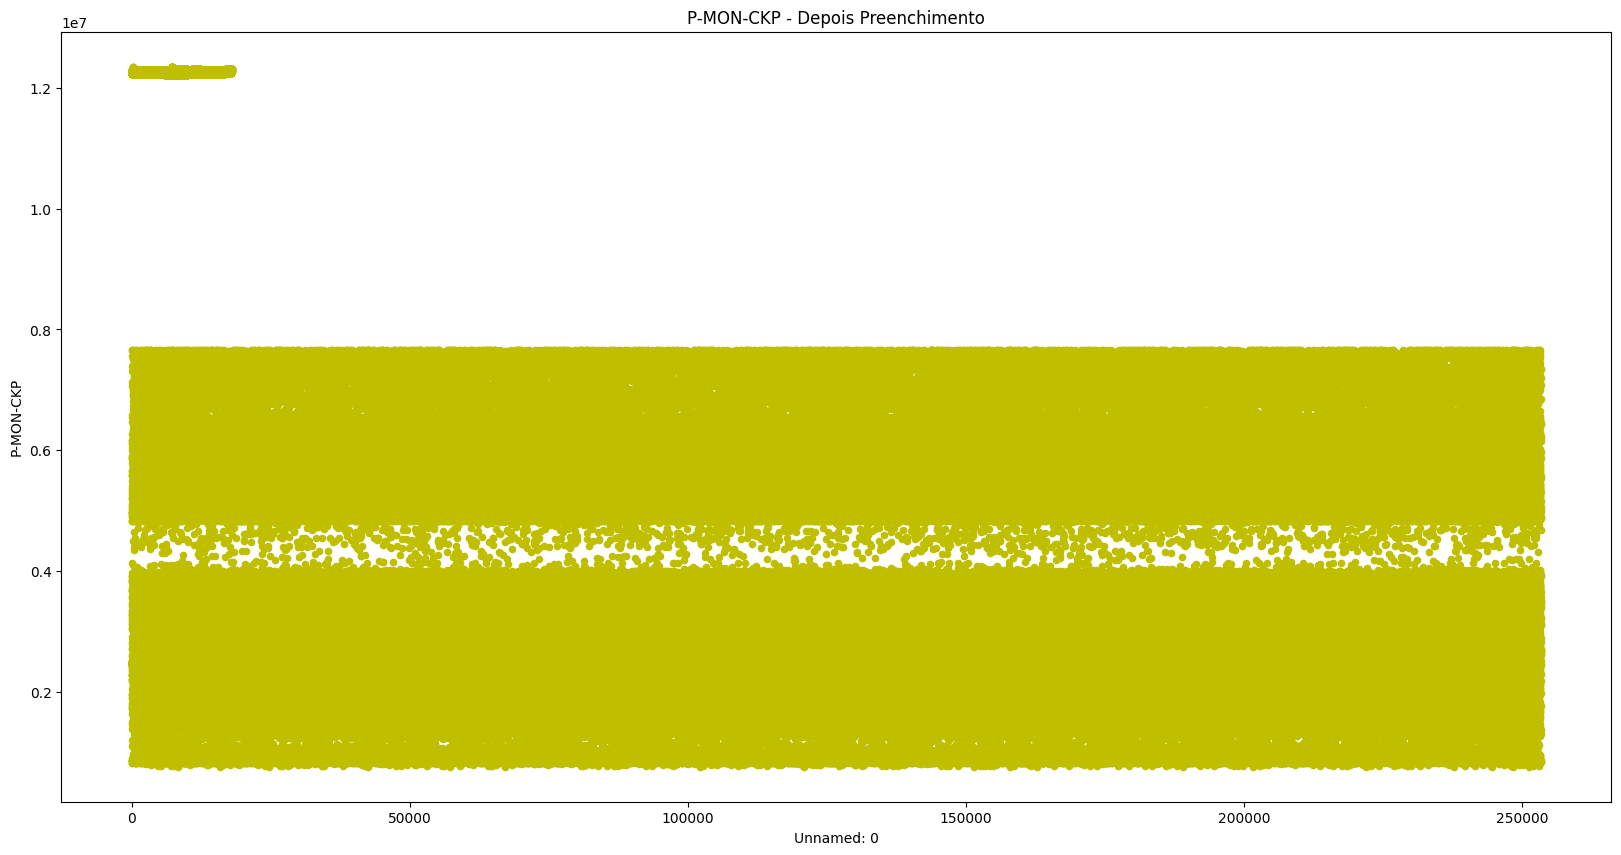

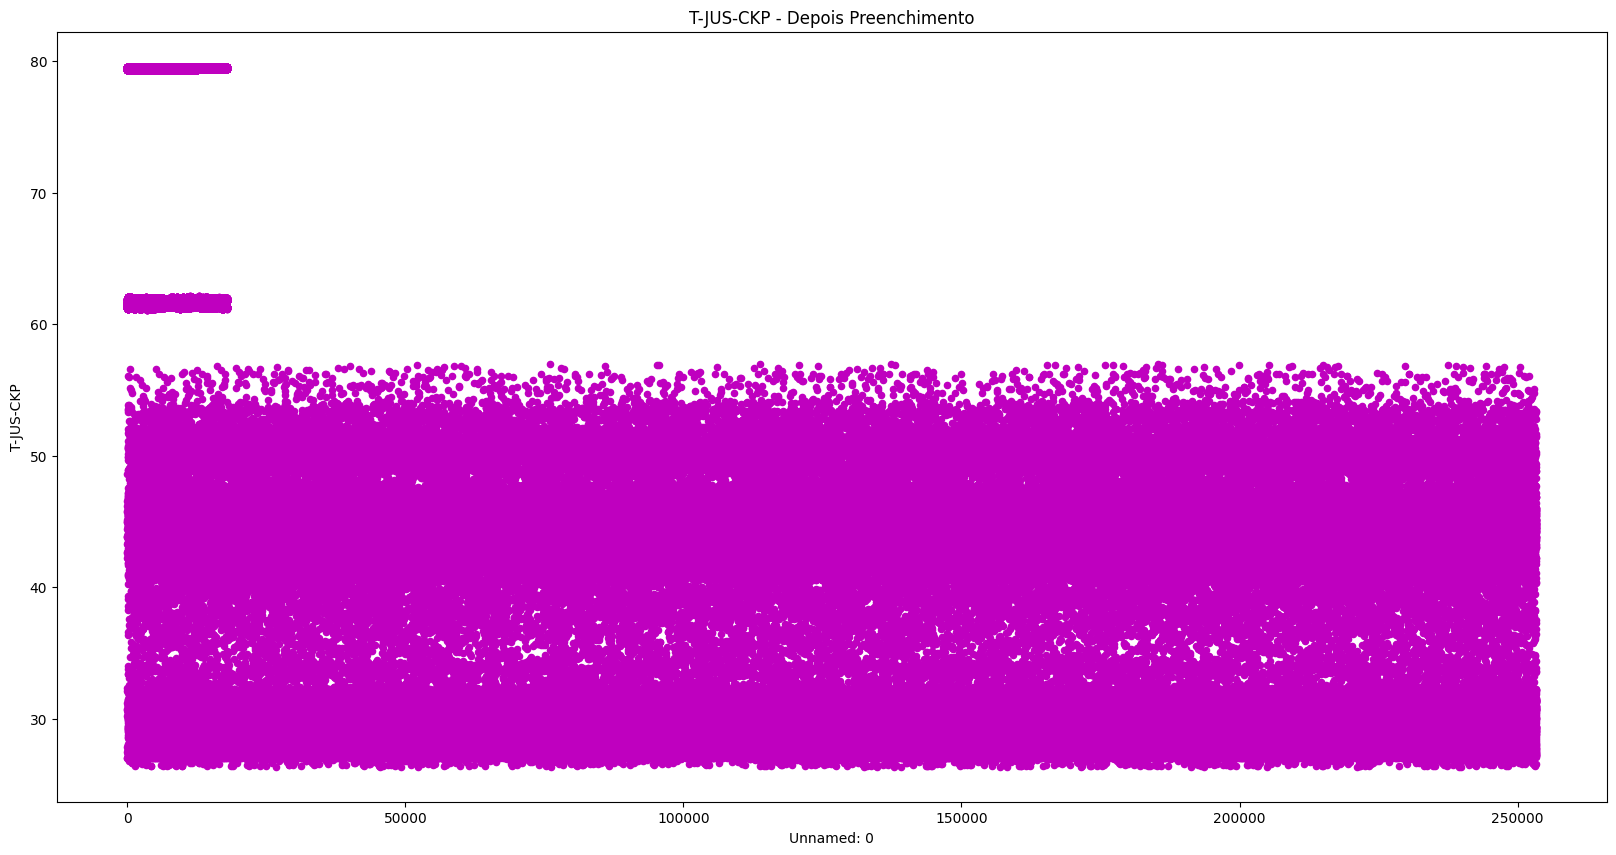

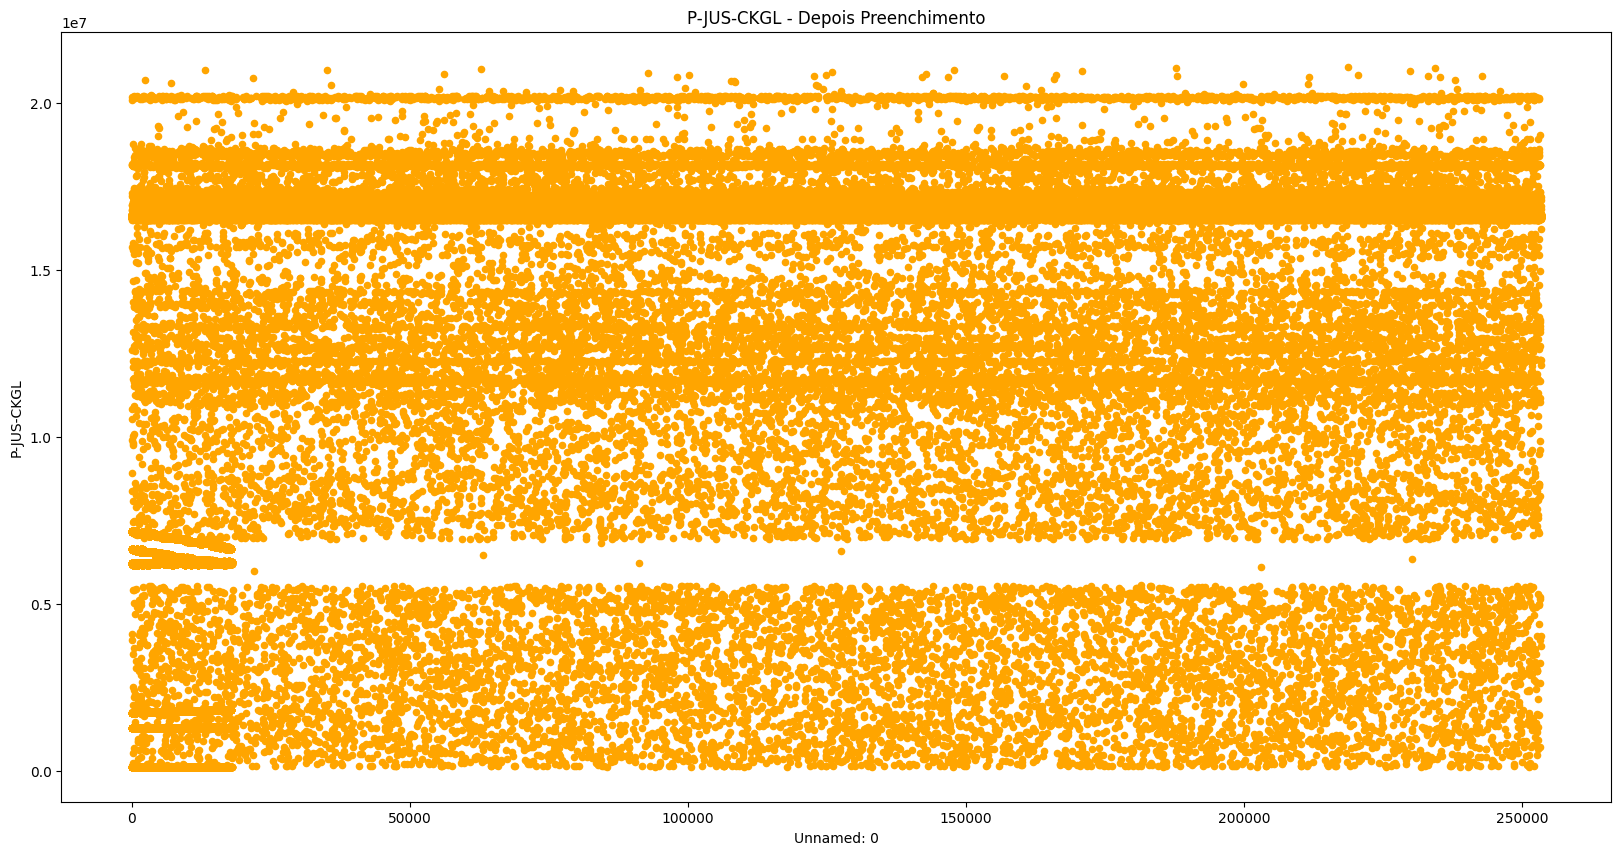

In [28]:
data_balance_with_real1.plot.scatter(x='Unnamed: 0',y='P-PDG',title='P-PDG - Depois Preenchimento',figsize=(20,10),color='b')
data_balance_with_real1.plot.scatter(x='Unnamed: 0',y='P-TPT',title='P-TPT - Depois Preenchimento',figsize=(20,10),color='r')
data_balance_with_real1.plot.scatter(x='Unnamed: 0',y='T-TPT',title='T-TPT - Depois Preenchimento',figsize=(20,10),color='g')
data_balance_with_real1.plot.scatter(x='Unnamed: 0',y='P-MON-CKP',title='P-MON-CKP - Depois Preenchimento',figsize=(20,10),color='y')
data_balance_with_real1.plot.scatter(x='Unnamed: 0',y='T-JUS-CKP',title='T-JUS-CKP - Depois Preenchimento',figsize=(20,10),color='m')
data_balance_with_real1.plot.scatter(x='Unnamed: 0',y='P-JUS-CKGL',title='P-JUS-CKGL - Depois Preenchimento',figsize=(20,10),color='orange')


In [36]:
X_1 = data_balance_with_real1.drop(columns=['Unnamed: 0','0']).copy()
Y_1 = data_balance_with_real1['0']

In [37]:
counter_1 = Counter(Y_1)
for k,v in counter_1.items():
	per = v / len(Y_1) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=5, n=229923 (51.185%)
Class=0, n=219275 (48.815%)


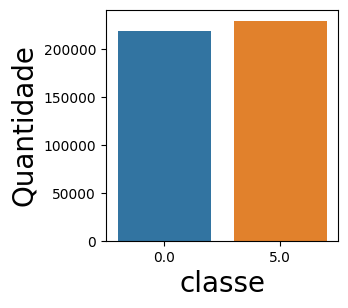

In [38]:
fig = plt.figure(figsize=(3,3))
ax = sns.countplot(data=data_balance_with_real1, x=Y_1)
np.bincount(Y_1)
plt.xlabel("classe",fontdict={'size':20})
plt.ylabel("Quantidade",fontdict={'size':20})
plt.show()

In [32]:
save_csv_if_doesnt_exist(data_balance_with_real1,'./oversampling/oversampling_with_real_data/train_real_filled_data1.csv')
save_csv_if_doesnt_exist(data_balance_with_real2,'./oversampling/oversampling_with_real_data/train_real_filled_data2.csv')
save_csv_if_doesnt_exist(data_balance_with_real3,'./oversampling/oversampling_with_real_data/train_real_filled_data3.csv')